# Salary Predict with Non-linear Regression 

#### Problem & Goal

Our aim is to predict the salary of baseball players in the project.
#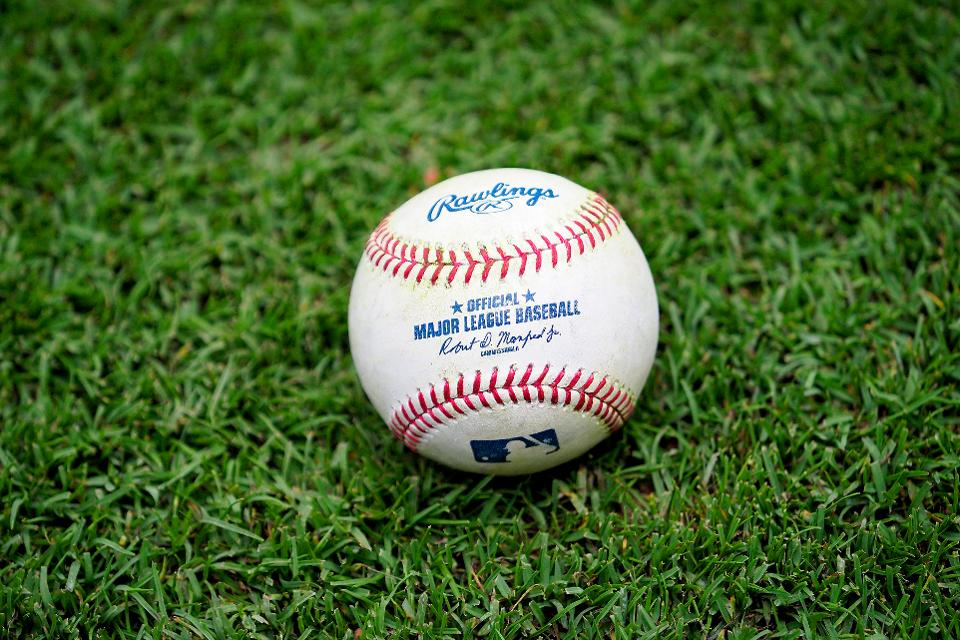

#### Features

* AtBat : Number of times at bat in 1986
* Hits : Number of hits in 1986
* HmRun : Number of home runs in 1986
* Runs : Number of runs in 1986
* RBI : Number of runs batted in in 1986
* Walks : Number of walks in 1986
* Years : Number of years in the major leagues
* CAtBat : Number of times at bat during his career
* CHits : Number of hits during his career
* CHmRun : Number of home runs during his career
* CRuns : Number of runs during his career
* CRBI : Number of runs batted in during his career
* CWalks : Number of walks during his career
* League : A factor with levels A and N indicating player’s league at the end of 1986
* Division : A factor with levels E and W indicating player’s division at the end of 1986
* PutOuts : Number of put outs in 1986
* Assists : Number of assists in 1986
* Errors : Number of errors in 1986
* Salary : 1987 annual salary on opening day in thousands of dollars
* NewLeague : A factor with levels A and N indicating player’s league at the beginning of 1987

# 1. Importing Libraries - Reading Data

* Importing Libraries

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

* Load data set

In [3]:
hitters_data = pd.read_csv("Hitters.csv")
df = hitters_data.copy()

#first 5 observations
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
#last 5 observations
df.tail()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A
321,631,170,9,77,44,31,11,4908,1457,30,775,357,249,A,W,408,4,3,1000.0,A


# 2. Data Preprocessing -  Exploratory Data Analysis (EDA)

## 2.1 General Info

* Structural Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

* Number of Sizes

In [6]:
df.shape

(322, 20)

* Columns

In [7]:
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

* Betimsel istatistik

In [8]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


* Numeric and Categoric Features

In [9]:
cat_features = ['League','Division','NewLeague'] 
num_features = list(df.select_dtypes(['int64']).columns)
num_features

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

## 2.2 Missing Values

In [10]:
#değişkenlerdeki tam değer sayısı
df.notnull().sum()

AtBat        322
Hits         322
HmRun        322
Runs         322
RBI          322
Walks        322
Years        322
CAtBat       322
CHits        322
CHmRun       322
CRuns        322
CRBI         322
CWalks       322
League       322
Division     322
PutOuts      322
Assists      322
Errors       322
Salary       263
NewLeague    322
dtype: int64

In [11]:
#değişkenlerdeki eksik değer sayısı
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [12]:
#en az bir eksik değere sahip gözlemler
df[df.isnull().any(axis=1)]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,NaN,A
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,N,W,1378,102,8,NaN,N
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,A,E,70,149,12,NaN,A
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,A,E,0,0,0,NaN,A
39,241,61,1,34,12,14,1,241,61,1,34,12,14,N,W,166,172,10,NaN,N
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,N,W,103,84,5,NaN,N


In [13]:
#tüm değerleri tam olan gözlemler
df[df.notnull().all(axis=1)]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


## Visualization of Missing Data

In [14]:
#!pip install missingno

In [15]:
#Eksik gözlemlerin görselleştirilmesi için missingno kütüphanesi import edilmiştir.
import missingno as msno

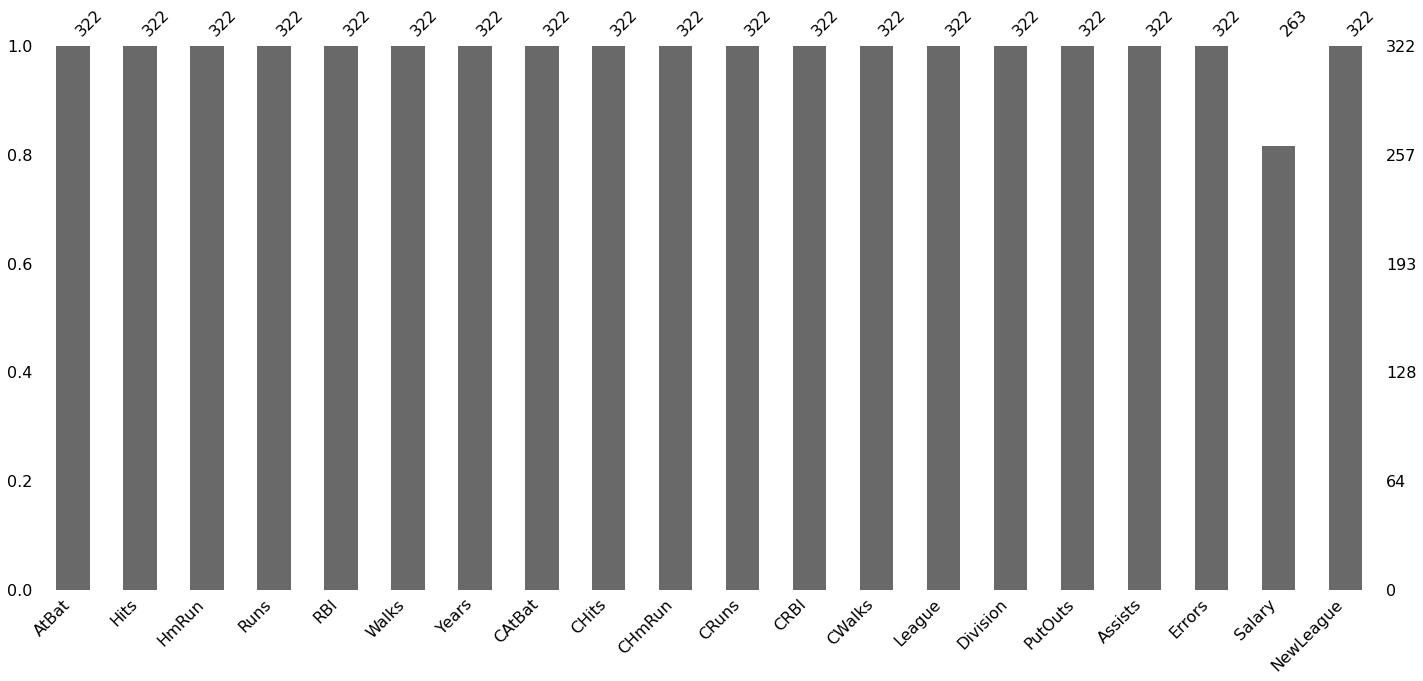

In [16]:
#Eksik gözlemler görselleştirilmiştir.
msno.bar(df);

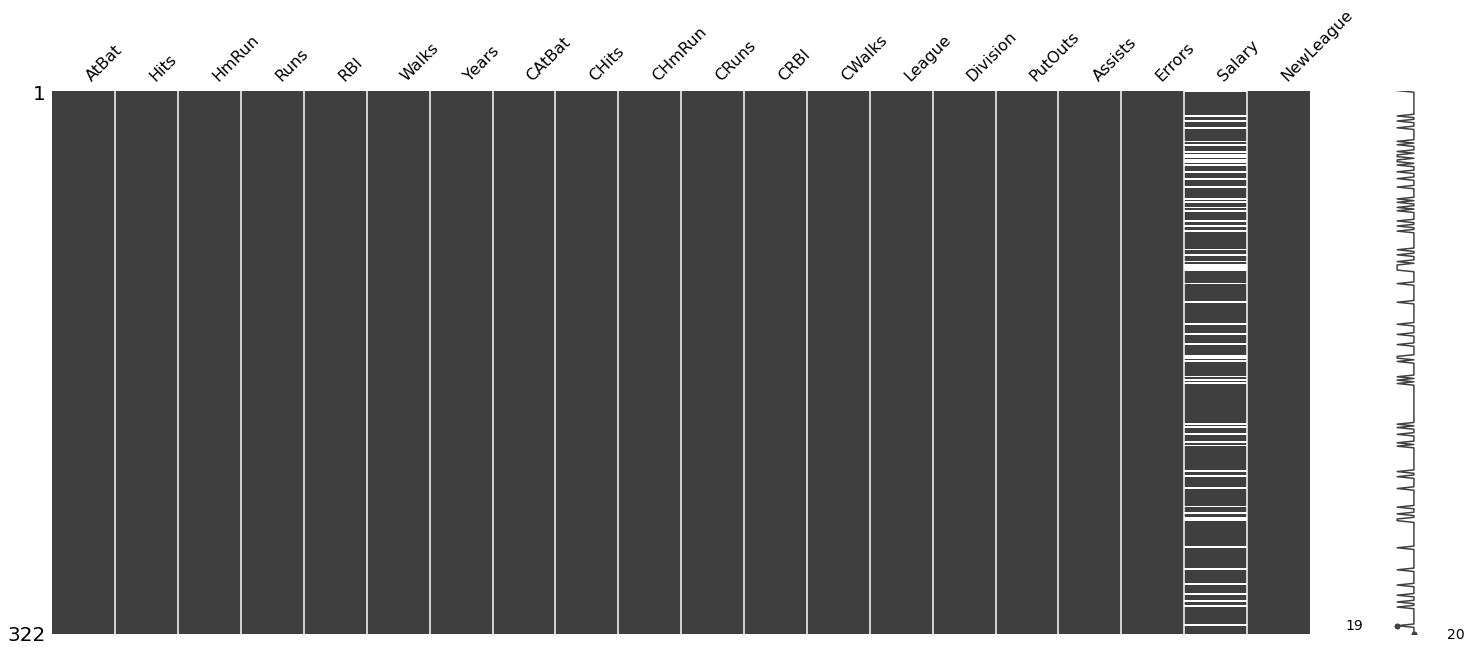

In [17]:
#Eksik gözlemler görselleştirilmiştir.
msno.matrix(df);

## 2.3 Filling in the missing data

League ve Division a bağlı olarak Salary İncelemesi

In [18]:
df["Years"].min()

1

In [19]:
df["Years"].max()

24

In [20]:
YearsGroup = pd.cut(df.Years,bins=[0,5,10,15,25],labels=['1', '2', '3' ,'4'])
df["YearsGroup"]=YearsGroup
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,YearsGroup
0,293,66,1,30,29,14,1,293,66,1,...,29,14,A,E,446,33,20,NaN,A,1
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.0,N,3
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.0,A,1
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.0,N,3
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.5,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,311,138,N,E,325,9,3,700.0,N,1
318,492,136,5,76,50,94,12,5511,1511,39,...,451,875,A,E,313,381,20,875.0,A,3
319,475,126,3,61,43,52,6,1700,433,7,...,93,146,A,W,37,113,7,385.0,A,2
320,573,144,9,85,60,78,8,3198,857,97,...,420,332,A,E,1314,131,12,960.0,A,2


In [21]:
df.groupby(["League","Division", "YearsGroup"])["Salary"].mean()

League  Division  YearsGroup
A       E         1             427.159091
                  2             787.252400
                  3             816.311353
                  4             665.416750
        W         1             223.935897
                  2             609.479188
                  3             835.250000
                  4             480.416667
N       E         1             325.930097
                  2             812.394684
                  3             894.322667
                  4             662.500000
        W         1             287.354167
                  2             539.393955
                  3             721.894000
                  4             665.555500
Name: Salary, dtype: float64

In [22]:
df["Salary"].fillna(df.groupby(["League","Division","YearsGroup"])["Salary"].transform("mean"),inplace=True)

In [23]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary        0
NewLeague     0
YearsGroup    0
dtype: int64

## 2.4 Outliers

**Boxplot**

Outliers can be accessed through the Boxplot method.

In [24]:
# 1.yol : Baskilama

num_features = df.select_dtypes(['int64']).columns

for feature in num_features:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    IQR = Q3-Q1
    
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    

    # Outliers'larin sayisini gorme
    
    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature," : " + str(df[(df[feature] > upper) | (df[feature] < lower)].shape[0]))
    else:
        print(feature, " : 0")

AtBat  : 0
Hits  : 0
HmRun  : 2
Runs  : 1
RBI  : 1
Walks  : 1
Years  : 2
CAtBat  : 5
CHits  : 6
CHmRun  : 32
CRuns  : 5
CRBI  : 26
CWalks  : 20
PutOuts  : 36
Assists  : 23
Errors  : 9


In [25]:
#1. yol : Baskılama
for i in df[["HmRun","Runs","RBI" ,"Walks","Years", "CAtBat", "CHits", "CHmRun","CRuns", "CRBI", "CWalks", "PutOuts", "Assists", "Errors","Salary"]]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    ust_sinir = Q3 + 1.5*IQR #alt_sinir değerleri 0'dan başlamaktadır.
    ust_sinir = int(ust_sinir)
    aykiri_tf = (df[i] > ust_sinir)
    df_i = df[i]
    df_i[aykiri_tf] = int(ust_sinir)

In [26]:
# 2.yol : LOF 
from sklearn.neighbors import LocalOutlierFactor

clf=LocalOutlierFactor(n_neighbors=8, contamination=0.1)
clf.fit_predict(df[num_features])
df_scores=clf.negative_outlier_factor_
df_scores= np.sort(df_scores)
df_scores[0:20]

array([-2.01808479, -1.93858727, -1.55252032, -1.49428148, -1.46380519,
       -1.45749447, -1.45278581, -1.45270979, -1.4340032 , -1.33333668,
       -1.30941552, -1.26222056, -1.25786422, -1.24213251, -1.23553762,
       -1.23033652, -1.22149747, -1.21807779, -1.20304297, -1.19431736])

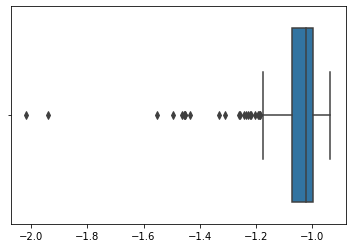

In [27]:
sns.boxplot(df_scores);

In [28]:
threshold=np.sort(df_scores)[7]
threshold
df = df.loc[df_scores > threshold]
df = df.reset_index(drop=True)

In [29]:
df.shape

(314, 21)

### 3.2 Creating New Features

In [30]:
#değişkenler arası korelasyon incelenir.
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967451,0.594569,0.913603,0.820712,0.673102,0.041107,0.243685,0.266379,0.270372,0.281924,0.270071,0.203319,0.309403,0.346972,0.356397,0.368058
Hits,0.967451,1.000000,0.563135,0.923022,0.810727,0.642899,0.037108,0.235251,0.270121,0.246032,0.277706,0.261616,0.193270,0.291863,0.312142,0.316345,0.404541
HmRun,0.594569,0.563135,1.000000,0.650101,0.855100,0.476247,0.115920,0.234172,0.237244,0.533433,0.279355,0.369589,0.253305,0.233483,-0.101798,0.056247,0.319133
Runs,0.913603,0.923022,0.650101,1.000000,0.797807,0.733476,0.000138,0.196488,0.221571,0.260072,0.267758,0.232240,0.218338,0.261299,0.216233,0.249711,0.384308
RBI,0.820712,0.810727,0.855100,0.797807,1.000000,0.614525,0.143382,0.305312,0.323553,0.488033,0.340199,0.415296,0.283473,0.290654,0.108067,0.207877,0.412738
Walks,0.673102,0.642899,0.476247,0.733476,0.614525,1.000000,0.135815,0.287018,0.297502,0.353778,0.351425,0.333032,0.440620,0.276505,0.155161,0.148746,0.418417
Years,0.041107,0.037108,0.115920,0.000138,0.143382,0.135815,1.000000,0.921667,0.907247,0.756286,0.886752,0.877300,0.854087,-0.009396,-0.082552,-0.162280,0.448302
CAtBat,0.243685,0.235251,0.234172,0.196488,0.305312,0.287018,0.921667,1.000000,0.995364,0.838694,0.983122,0.960333,0.920940,0.052039,0.005369,-0.061900,0.550789
CHits,0.266379,0.270121,0.237244,0.221571,0.323553,0.297502,0.907247,0.995364,1.000000,0.835339,0.985010,0.959684,0.911267,0.058294,0.002565,-0.056949,0.575662
CHmRun,0.270372,0.246032,0.533433,0.260072,0.488033,0.353778,0.756286,0.838694,0.835339,1.000000,0.859444,0.939764,0.835016,0.116477,-0.151444,-0.128035,0.548654


In [31]:
#df['New_HitRate']=df["CHits"]/df["CAtBat"]

In [32]:
"""df['New_AtBat']=df["CAtBat"]/df["Years"]
df['New_RBI']=df["CRBI"]/df["Years"]
df['New_Walks']=df["CWalks"]/df["Years"]
df['New_Hits']=df["CHits"]/df["Years"]
df['New_HmRun']=df["CHmRun"]/df["Years"]
df['New_Runs']=df["CRuns"]/df["Years"]
"""

'df[\'New_AtBat\']=df["CAtBat"]/df["Years"]\ndf[\'New_RBI\']=df["CRBI"]/df["Years"]\ndf[\'New_Walks\']=df["CWalks"]/df["Years"]\ndf[\'New_Hits\']=df["CHits"]/df["Years"]\ndf[\'New_HmRun\']=df["CHmRun"]/df["Years"]\ndf[\'New_Runs\']=df["CRuns"]/df["Years"]\n'

## 3.2  Kategorik Değişkenlerde Ölçeklendirme

In [33]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

In [34]:
lbe.fit_transform(df["League"])
df["donusum_League"] = lbe.fit_transform(df["League"])

In [35]:
lbe.fit_transform(df["NewLeague"])
df["donusum_NewLeague"] = lbe.fit_transform(df["NewLeague"])

In [36]:
lbe.fit_transform(df["Division"])
df["donusum_Division"] = lbe.fit_transform(df["Division"])

In [37]:
df = pd.concat([df, pd.get_dummies(df["YearsGroup"],prefix="yearsgroup")], axis = 1)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Salary,NewLeague,YearsGroup,donusum_League,donusum_NewLeague,donusum_Division,yearsgroup_1,yearsgroup_2,yearsgroup_3,yearsgroup_4
0,323,81,6,26,32,8,2,341,86,6,...,75.000,N,1,1,1,1,1,0,0,0
1,401,92,17,49,66,65,13,5206,1332,204,...,1100.000,A,3,0,0,0,0,0,1,0
2,574,159,21,107,75,59,10,4631,1300,90,...,517.143,A,2,0,0,0,0,1,0,0
3,202,53,4,31,26,27,9,1876,467,15,...,512.500,N,2,1,1,1,0,1,0,0
4,418,113,13,48,61,47,4,1512,392,41,...,550.000,N,1,1,1,0,1,0,0,0


In [38]:
columns = ["League","NewLeague", "Division"]
df.drop(columns ,axis = 1,inplace=True)

## 3.3 Sürekli Değişkenlerde Ölçeklendirme 

In [39]:
from sklearn import preprocessing
y = df[["Salary"]]
X = df.drop('Salary', axis=1)

In [40]:
#1.yol : Standard Scaler Yöntemi
cols = X.columns
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns = cols)

In [41]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Assists,Errors,YearsGroup,donusum_League,donusum_NewLeague,donusum_Division,yearsgroup_1,yearsgroup_2,yearsgroup_3,yearsgroup_4
0,-0.222437,-0.203390,-0.166667,-0.567742,-0.326531,-0.850394,-0.571429,-0.514452,-0.502797,-0.412903,...,1.581761,1.625,-0.5,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.079304,-0.054237,0.750000,0.025806,0.598639,0.944882,1.000000,1.061129,0.964380,2.141935,...,-0.242138,-0.750,0.5,0.0,0.0,-1.0,0.0,0.0,1.0,0.0
2,0.748549,0.854237,1.083333,1.522581,0.843537,0.755906,0.571429,0.874909,0.926700,0.670968,...,2.298742,2.000,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0
3,-0.690522,-0.583051,-0.333333,-0.438710,-0.489796,-0.251969,0.428571,-0.017327,-0.054165,-0.296774,...,0.040881,0.625,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.145068,0.230508,0.416667,0.000000,0.462585,0.377953,-0.285714,-0.135212,-0.142479,0.038710,...,-0.172956,0.125,-0.5,1.0,1.0,-1.0,1.0,0.0,0.0,0.0


## 2.5 Scatter Charts

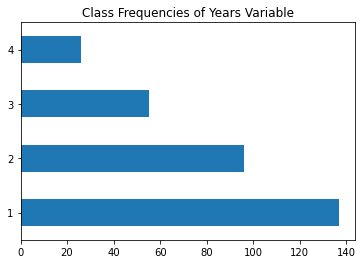

In [42]:
#YearsGrouplara göre toplam oyuncu sayıları
df["YearsGroup"].value_counts().plot.barh().set_title("Class Frequencies of Years Variable");

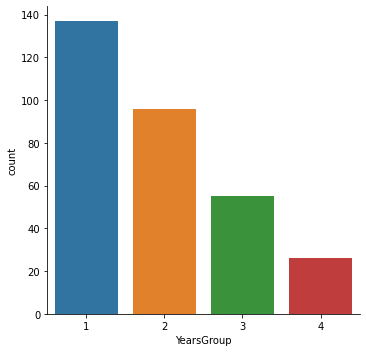

In [43]:
#Yearsgrouplara göre sınıflandırıldığında toplam oyuncu sayıları
sns.catplot('YearsGroup',data=df,kind='count')

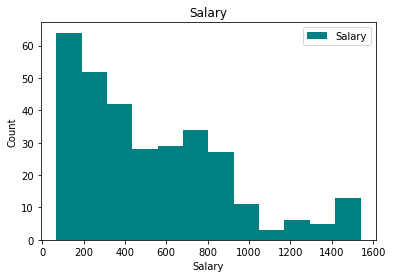

In [44]:
#Salary değişkeninin histogram grafiği 
plt.hist(df.Salary,bins=12,
         color='#008080',label="Salary") 

plt.xlabel("Salary")
plt.ylabel("Count")
plt.legend()
plt.title("Salary")

plt.show()

# 3. Doğrusal Olmayan Regresyon Modelleri

# 3.1 KNN

#### Veri Setini Ayırmadan

In [45]:
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score


In [46]:
y = df["Salary"]
X = df.drop('Salary', axis=1)

In [47]:
knn_model = KNeighborsRegressor().fit(X, y)
knn_model

KNeighborsRegressor()

In [48]:
y_pred = knn_model.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

213.545834730344

In [49]:
#GridSearchCV

In [50]:
knn_params = {"n_neighbors": np.arange(2,5,1),
              "algorithm" : ("auto", "ball_tree", "kd_tree","brute"),
              "p" : np.arange(1,2,1)
             }

knn_model = KNeighborsRegressor()

knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X, y)

In [51]:
knn_cv_model.best_params_

{'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}

In [52]:
knn_tuned = KNeighborsRegressor(**knn_cv_model.best_params_).fit(X, y)

In [53]:
y_pred = knn_tuned.predict(X)

In [54]:
np.sqrt(mean_squared_error(y, y_pred))

204.9880738229299

### Veri Seti Train ve test olarak ayrılırsa

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [56]:
y = df["Salary"]
X = df.drop('Salary', axis=1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [58]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_model

KNeighborsRegressor()

In [59]:
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

302.9634605525841

In [60]:
RMSE = []

for k in range(20):
    k = k + 2
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k =", k, "için RMSE değeri:", rmse)

k = 2 için RMSE değeri: 304.31701170604487
k = 3 için RMSE değeri: 293.60059456592154
k = 4 için RMSE değeri: 296.4922690308072
k = 5 için RMSE değeri: 302.9634605525841
k = 6 için RMSE değeri: 297.0054013673429
k = 7 için RMSE değeri: 293.5307168988608
k = 8 için RMSE değeri: 301.4731177353933
k = 9 için RMSE değeri: 296.73911539501665
k = 10 için RMSE değeri: 294.6305828514946
k = 11 için RMSE değeri: 295.5286337681275
k = 12 için RMSE değeri: 292.0891538135485
k = 13 için RMSE değeri: 293.85999388036953
k = 14 için RMSE değeri: 294.7732590526817
k = 15 için RMSE değeri: 292.5001196587115
k = 16 için RMSE değeri: 294.0669890718195
k = 17 için RMSE değeri: 297.026347955234
k = 18 için RMSE değeri: 298.0050567747566
k = 19 için RMSE değeri: 298.67895419693997
k = 20 için RMSE değeri: 296.93472653390126
k = 21 için RMSE değeri: 295.94013979426165


In [61]:
#GridSearchCV

In [62]:
knn_params = {"n_neighbors": np.arange(2,4,1),
              "algorithm" : ("auto", "ball_tree", "kd_tree","brute"),
              "p" : np.arange(1,2,1),
              "weights" : ("uniform", "distance")
             }

knn_model = KNeighborsRegressor()

knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train, y_train)

In [63]:
knn_cv_model.best_params_

{'algorithm': 'brute', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [64]:
knn_tuned = KNeighborsRegressor(**knn_cv_model.best_params_).fit(X_train, y_train)

In [65]:
y_pred = knn_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

298.16558239633645

# 3.2 SVR 

### Veri setini ayırmadan

### Model

In [66]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [67]:
svr_model = SVR("linear").fit(X, y)

In [68]:
svr_model

SVR(kernel='linear')

In [69]:
y_pred = svr_model.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

262.6423991138308

### Tuning

In [70]:
?SVR

Init signature:
SVR(
    *,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)
Docstring:     
Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.

The implementation is based on libsvm. The fit time complexity
is more than quadratic with the number of samples which makes it hard
to scale to datasets with more than a couple of 10000 samples. For large
datasets consider using :class:`sklearn.svm.LinearSVR` or
:class:`sklearn.linear_model.SGDRegressor` instead, possibly after a
:class:`sklearn.kernel_approximation.Nystroem` transformer.

Read more in the :ref:`User Guide <svm_regression>`.

Parameters
----------
kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
     Specifies the kernel type to be used in the algorithm.
     It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' o

In [ ]:
#linear
svr_model = SVR("linear") 

svr_params = {"C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1,10,100,500,1000],
             "gamma" : ("scale", "auto") ,
              
                         }

svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, n_jobs = -1, verbose =  2).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:   20.0s


In [ ]:
svr_cv_model.best_params_

In [ ]:
svr_tuned = SVR(**svr_cv_model.best_params_).fit(X, y)

In [ ]:
y_pred = svr_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
#nonlinear
svr_model = SVR() 

svr_params = {"C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1, 10, 100, 500,1000]}

svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, n_jobs = -1, verbose =  2).fit(X, y)

In [ ]:
svr_cv_model.best_params_

In [ ]:
svr_tuned = SVR(**svr_cv_model.best_params_).fit(X, y)

In [ ]:
y_pred = svr_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

#### Veri seti test ve train olarak ayrılırsa

## Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [ ]:
svr_model = SVR("linear").fit(X_train, y_train)

In [ ]:
svr_model

In [ ]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Tuning

In [ ]:
svr_model = SVR("linear") 

svr_params = {"C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1,5,10,100,250,500,750,1000]}

svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, n_jobs = -1, verbose =  2).fit(X_train, y_train)

In [ ]:
svr_cv_model.best_params_

In [ ]:
svr_tuned = SVR(**svr_cv_model.best_params_).fit(X_train, y_train)

In [ ]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
#nonlinear
svr_model = SVR() 

svr_params = {"C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1, 10, 100, 250,500,750,1000]}

svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, n_jobs = -1, verbose =  2).fit(X_train, y_train)

In [ ]:
svr_cv_model.best_params_

In [ ]:
svr_tuned = SVR(**svr_cv_model.best_params_).fit(X_train, y_train)

In [ ]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# 3.3 Yapay Sinir Ağları

### Model

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor().fit(X, y)

In [ ]:
y_pred = mlp_model.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

## Model Tuning

In [ ]:
?mlp_model

In [ ]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
             "hidden_layer_sizes": [(10,20), (5,5), (100,100), (1000,100,10)],
              "activation" : ('identity', 'logistic', 'tanh', 'relu')
             }


In [ ]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X, y)

In [ ]:
mlp_cv_model.best_params_

In [ ]:
mlp_tuned = MLPRegressor(**mlp_cv_model.best_params_).fit(X, y)

In [ ]:
y_pred = mlp_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

## 3.4 CART

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
cart_model = DecisionTreeRegressor(random_state = 46)
cart_model.fit(X_train, y_train)

In [ ]:
#Bir fonksiyonun türevinin sıfır olduğu nokta eğitimidir, gradyanıdır, bu noktanın negatif yonu ilgili fonksiyonu azaltır.

In [ ]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
#agac gelistirirken verinin 3'te 2'si train için 3'te 1'i başarı değerlendirme için kullanılır.

# Model Tuning

In [ ]:
?cart_model

In [ ]:
cart_params = {"max_depth": [2,3,4,5,10,20, 100, 1000],
              "min_samples_split": [2,10,5,30,50,10]}

In [ ]:
cart_model = DecisionTreeRegressor()

In [ ]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)
cart_cv_model.best_params_

In [ ]:
cart_tuned = DecisionTreeRegressor(**cart_cv_model.best_params_).fit(X_train, y_train)

In [ ]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# 3.5 Random Forests

## Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 46).fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
?rf_model

In [ ]:
rf_params = {"max_depth": [5,8,10,None],
            "max_features": [2,5,10,15,17],
            "n_estimators": [100,200, 500, 1000],
            "min_samples_split": [2,5,10,20,30]}

In [ ]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
rf_cv_model.best_params_

In [ ]:
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)       
print("RMSE: " + str(rmse))

In [ ]:
#feature importance
rf_tuned.feature_importances_

In [ ]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# 3.6 Gradient Boosting Machines (GBM)

## Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [ ]:
y_pred = gbm_model.predict(X_test)
print("RMSE : " + str(mean_squared_error(y_test, y_pred, squared = False)))

## Model Tuning

In [ ]:
gbm_params = {"learning_rate": [0.001,0.1,0.01, 0.05],
             "max_depth": [3,5,8,9,10],
             "n_estimators": [200,500,1000,1500],
             "subsample": [1,0.4,0.5,0.7],
             "loss": ["ls","lad","quantile"]}

In [ ]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [ ]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 10, 
                            n_jobs=-1, 
                            verbose = 2).fit(X, y)

In [ ]:
gbm_cv_model.best_params_

In [ ]:
?gbm_tuned

In [ ]:
gbm_tuned = GradientBoostingRegressor(**gbm_cv_model.best_params_).fit(X_train, y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))